# Ejemplo_PCA

El objetivo es demostrar la capacidad de PCA para reducir las dimensiones y mantener un modelo que representa al dataset.

En este caso, MINIST representa los digitos con una dimensionalidad de 784 y vamos a reducirlas a 2 para plotearlas.

In [1]:
# https://deeplearningcourses.com/c/unsupervised-deep-learning-in-python
# https://www.udemy.com/unsupervised-deep-learning-in-python

from __future__ import print_function, division
from builtins import range, input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.decomposition import PCA

In [2]:
def getKaggleMNIST():
    # MNIST data:
    # column 0 is labels
    # column 1-785 is data, with values 0 .. 255
    # total size of CSV: (42000, 1, 28, 28)
    train = pd.read_csv('/home/jorge/data/MNIST/train.csv').as_matrix().astype(np.float32)
    train = shuffle(train)

    Xtrain = train[:-1000,1:] / 255
    Ytrain = train[:-1000,0].astype(np.int32)

    Xtest  = train[-1000:,1:] / 255
    Ytest  = train[-1000:,0].astype(np.int32)
    return Xtrain, Ytrain, Xtest, Ytest


In [3]:
# leemos los datos con la funcion
Xtrain, Ytrain, Xtest, Ytest = getKaggleMNIST()


# creamos un objeto de la clase PCA
pca = PCA()

# Aplicamos la transformación con fit_transform()
reduced = pca.fit_transform(Xtrain)


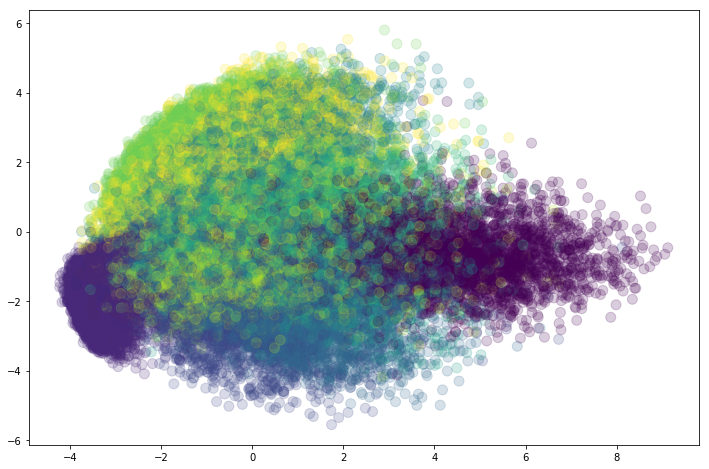

In [12]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(reduced[:,0], reduced[:,1], s=100, c=Ytrain, alpha=0.2)
plt.show()

Se ve en la imagen anterior que, aunque solo representemos los digitos con 2 variables, los datos se agrupan en clusters (de 0 a 9).

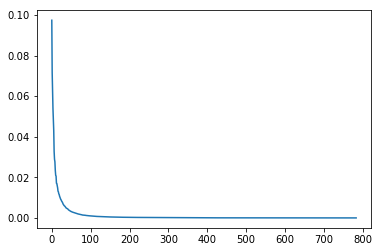

In [5]:
# Ahora graficamos la relacion de varianza explicada
plt.plot(pca.explained_variance_ratio_)
plt.show()


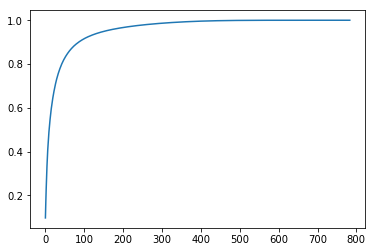

In [6]:
# Y ahora la varianza acumulada
# choose k = number of dimensions that gives us 95-99% variance
cumulative = []
last = 0
for v in pca.explained_variance_ratio_:
    cumulative.append(last + v)
    last = cumulative[-1]
    
plt.plot(cumulative)
plt.show()